# References
1. [Customer Segmentation using RFM Analysis](https://www.kaggle.com/sarahm/customer-segmentation-using-rfm-analysis)
2. [RFM Analysis](https://www.kaggle.com/yugagrawal95/rfm-analysis)
3. [RFM Analysis Using Online Retail II Dataset](https://www.kaggle.com/sevvalyurtekin/rfm-analysis-using-online-retail-ii-dataset)
4. [RFM Analysis For Successful Customer Segmentation](https://www.kaggle.com/abdulmeral/rfm-analysis-for-successful-customer-segmentation)
5. [CRM Analytics](https://www.kaggle.com/sercanyesiloz/crm-analytics)
6. [Complete E-Commerce Analysis](https://www.kaggle.com/anmoltripathi/complete-e-commerce-analysis)

# 각 커널의 아이디어
## 1. Customer Segmentation using RFM Analysis
### Preprocessing
- `Country` == 'United Kingdom'
- `Quantity` > 0
- `CustomerID` is not null
- `InvoiceDate` >= '2010-12-09'

### How to create customer segments from RFM Models
- Quartile
    - `R_Quartile`:
        - 4: <= .25
        - 3: <= .5
        - 2: <= .75
        - 1: else
    - `F_Quartile`, `M_Quartile`:
        - 1: <= .25
        - 2: <= .5
        - 3: <= .75
        - 4: else
    - `RFMScore`: str(R_Quartile) + str(F_Quartile) + str(M_Quartile)

### How to interpret model
- Best Customers: RFMScore == '444'
- Loyal Customers: F_Quartile == 4
- Big Spenders: M_Quartile == 4
- Almost Lost: RFMScore == '244'
- Lost Customers: RFMScore == '144'
- Lost Cheap Customers: RFMScore == '111'
    
## 2. RFM Analysis
### Preprocessing
- `Country` == 'United Kingdom'
- `Quantity` > 0
- `UnitPrice` > 0
- `CustomerID` is not null

### How to create customer segments from RFM Models
- K-Means
- Quartile ( 생략 )

### How to interpret model
#### K-Means: Elbow Method를 사용해 군집 수를 결정
- 3개의 군집으로 나눔
- 각 군집에 대한 데이터를 보고 이름을 붙임
    - cluster 0 have high recency rate which is bad. cluster 1 and cluster 2 having low so they are in race of platinum and gold customer.
    - cluster 0 have low frequency rate which is bad. cluster 1 and cluster 2 having high so they are in race of platinum and gold customer.
    - cluster 0 have low Monetary rate which is bad. cluster 1 have highest Montary (money spend) platinum where as cluster 2 have medium level(Gold) and cluster 0 is silver customer.
    
## 3. RFM Analysis Using Online Retail II Dataset
- [Online Retail II Data Set from ML Repository](https://www.kaggle.com/mathchi/online-retail-ii-data-set-from-ml-repository) 데이터셋 사용

### Preprocessing
- dropna
- `InvoiceNo` do not starts with 'C'

### How to create customer segments from RFM Models
- Quartile
    - qcut함수를 사용해 깔끔하게 구현
    - `R_Quartile`:
        - 5: <= .2
        - 4: <= .4
        - 3: <= .6
        - 2: <= .8
        - 1: else
    - `F_Quartile`, `M_Quartile`:
        - 1: <= .2
        - 2: <= .4
        - 3: <= .6
        - 4: <= .8
        - 5: else
    - `RFM_SCORE`: str(R_Quartile) + str(F_Quartile)
    - `RFM_SCORE`를 계산할 때 `M_Quartile`은 고려하지 않는다는 점에 주의
    
### How to interpret model
#### `RFM_SCORE`을 기준으로 다음과 같이 분류
```python
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}
```

## 4. RFM Analysis For Successful Customer Segmentation
### Preprocessing
- `TotalPrice` = `UnitPrice` * `Quantity`
- `Country` == 'United Kingdom'
- `Quantity` > 0
- `TotalPrice` > 0

### How to create customer segments from RFM Models
- Quartile
    - `Rec_Tile`:
        - 5: <= .2
        - 4: <= .4
        - 3: <= .6
        - 2: <= .8
        - 1: else
    - `Freq_Tile`, `Mone_Tile`:
        - 1: <= .2
        - 2: <= .4
        - 3: <= .6
        - 4: <= .8
        - 5: else
    - `RFM Score`: str(Rec_Tile) + str(Freq_Tile) + str(Mone_Tile)
    - `RFM_Sum`: Rec_Tile + Freq_Tile + Mone_Tile
- K-Means

### How to interpret model
#### Quartile: `RFM_Sum`을 기준으로 평가
- Can't Loose Them: >= 9
- Champions: >= 8
- Loyal: >= 7
- Potential: >= 6
- Promising: >= 5
- Needs Attention: >= 4
- Require Activation: else

#### K-Means: Elbow Method를 사용해 군집 수를 결정
- RFM 데이터를 Min Max Scaling했다.
- 4개의 군집으로 나눔
- No interprets

## 5. CRM Analytics
- 시각화가 잘 되어있음
### Preprocessing
- `InvoiceNo` do not starts with 'C'
- `Quantity` > 0
- Remove Outliers ( `UnitPrice`, `Quantity` )
    - Q1: quartile 0.01
    - Q3: quartile 0.99
    - IQR 방식을 이용해 이상치 제거
- `TotalPrice` = `UnitPrice` * `Quantity`

### How to create customer segments from RFM Models
- Quartile
    - `recency_score`:
        - 5: <= .2
        - 4: <= .4
        - 3: <= .6
        - 2: <= .8
        - 1: else
    - `frequency_score`, `monetary_score`:
        - 1: <= .2
        - 2: <= .4
        - 3: <= .6
        - 4: <= .8
        - 5: else
    - `RFM_SCORE`: str(recency_score) + str(frequency_score) + str(monetary_score)
- K-Means
    
### How to interpret model
#### Quartile: `RFM_SCORE`을 기준으로 다음과 같이 분류
```python
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}
```

#### K-Means: Elbow Method를 사용해 군집 수를 결정
- 데이터는 `recency_score`, `frequency_score`만 사용
- 3개의 군집으로 나눔
- No interprets

## 6. Complete E-Commerce Analysis
### Preprocessing
- `TotalPrice` = `UnitPrice` * `Quantity`
- `TotalPrice` >= 0

### How to create customer segments from RFM Models
- K-Means
    
### How to interpret model
#### K-Means: Elbow Method를 사용해 군집 수를 결정
- 데이터는 `recency_score`, `frequency_score`만 사용
- 3개의 군집으로 나눔
- 각 군집에 대한 RFM 데이터를 보고 다음과 같이 분류
| Clusters | Recency                   | Frequency         | Monetary         |
|----------|---------------------------|-------------------|------------------|
| 0        | Have not visited recently | Least frequent    | Least spending   |
| 1        | Most recently visited     | Highest frequency | Spending Highest |
| 2        | Recently visited          | Decent frequency  | Decent Spending  |

# 참고자료 요약
1. RFM 데이터를 가지고 고객 세분화를 하는 방법은 크게 세 가지가 있었다. 이름은 내가 임의로 붙인 것이다.
    1. **Quartile String**: Quartile을 기반으로 점수를 산출하고, 점수를 이어붙여 문자열로 만든다. 같은 패턴을 보이는 고객을 묶어 군집화한다.
    2. **Quartile Sum**: Quartile을 기반으로 점수를 산출하고, 점수를 더한다. 비슷한 점수를 받은 고객들을 군집화한다.
    3. **K-Means**: RFM 데이터를 K-Means로 군집화 한다.
2. 데이터 전처리는 다음과 같았다.
    1. `Quantity`, `UnitPrice`가 0 이하인 거래내역 삭제
    2. `Country` 칼럼에서 영국만 남겨두기
    3. `CustomerID`가 null인 거래내역 삭제
    4. `InvoiceNo`가 'C'로 시작하는 거래내역 삭제
3. Quartile을 사용하여 4개로 구분하는 커널도 있었고, 5개로 구분하는 커널도 있었다.
4. K-Means를 사용하는 대부분의 커널은 Elbow-Methods를 사용하였으며, 대부분은 군집 수가 3이었다.
5. K-Means를 통해 군집화를 할 대, RFM 모두 사용하는 것이 아니라 RF만 사용하는 것이 많았다.
6. K-Means를 하기 전에 데이터를 Min Max Scaling하는 경우가 있었다.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ecommerce-data/data.csv


In [2]:
df = pd.read_csv('/kaggle/input/ecommerce-data/data.csv', 
                 dtype={'InvoiceNo': str, 'StockCode': str, 'Description': str, 'Quantity': int, 'UnitPrice': float, 'CustomerID': str, 'Country': str}, 
                 encoding='ISO-8859-1',
                 parse_dates=['InvoiceDate'])

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df.describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [5]:
df.nunique().to_frame().transpose()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,25900,4070,4223,722,23260,1630,4372,38


In [6]:
df = df[
    (df['Country'] == 'United Kingdom') &
    (~df['CustomerID'].isnull()) &
#     (~df['InvoiceNo'].str.startswith('C')) &
#     (df['Quantity'] > 0) & 
    (df['UnitPrice'] > 0) & 
    (~df['StockCode'].str.isalpha()) &
    (~df['StockCode'].str.contains('BANK|C2|DCGS|gift'))
].reset_index(drop=True)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [7]:
pd.DataFrame(
    index=['Quantity > 0', 'Quantity <= 0'], 
    columns=["Starts with 'C'", "Do not starts with 'C'"],
    data=[
          [len(df[(df['Quantity'] > 0) & (df['InvoiceNo'].str.startswith('C'))]), len(df[(df['Quantity'] > 0) & (~df['InvoiceNo'].str.startswith('C'))])],
          [len(df[(df['Quantity'] <= 0) & (df['InvoiceNo'].str.startswith('C'))]), len(df[(df['Quantity'] <= 0) & (~df['InvoiceNo'].str.startswith('C'))])]
          ]
    )

,Starts with 'C',Do not starts with 'C'
Quantity > 0,0,353985
Quantity <= 0,7250,0


In [8]:
pd.DataFrame(
    index=['UnitPrice > 0', 'UnitPrice <= 0'], 
    columns=["Starts with 'C'", "Do not starts with 'C'"],
    data=[
          [len(df[(df['UnitPrice'] > 0) & (df['InvoiceNo'].str.startswith('C'))]), len(df[(df['UnitPrice'] > 0) & (~df['InvoiceNo'].str.startswith('C'))])],
          [len(df[(df['UnitPrice'] <= 0) & (df['InvoiceNo'].str.startswith('C'))]), len(df[(df['UnitPrice'] <= 0) & (~df['InvoiceNo'].str.startswith('C'))])]
          ]
    )

,Starts with 'C',Do not starts with 'C'
UnitPrice > 0,7250,353985
UnitPrice <= 0,0,0


## Remove Outliers

In [9]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
    
replace_with_thresholds(df, "Quantity")
replace_with_thresholds(df, "UnitPrice")

In [10]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


## M ( Monetary )
- 취소된 주문은 차감해줘야 한다.

In [11]:
monetary = df.groupby('CustomerID', as_index=False)['TotalPrice'].agg(sum)
monetary.rename(columns={'TotalPrice': 'monetary'}, inplace=True)
monetary.head()

,CustomerID,monetary
0,12346,101.92
1,12747,4196.01
2,12748,30365.93
3,12749,3818.20
4,12820,942.34


# F ( Frequency )
- 취소된 주문은 세면 안된다.

In [12]:
print(len(df[df['Quantity'] <= 0]))

df = df[
    (df['Quantity'] > 0)
].reset_index(drop=True)

7250


In [13]:
frequency = df.groupby('CustomerID')['InvoiceDate'].agg(lambda x: len(set(x.dt.date))).to_frame().reset_index()
frequency.rename(columns={'InvoiceDate': 'frequency'}, inplace=True)
frequency.head()

,CustomerID,frequency
0,12346,1
1,12747,11
2,12748,113
3,12749,4
4,12820,4


# R ( Recency )

In [14]:
max_date = max(df['InvoiceDate'].dt.date)
max_date

datetime.date(2011, 12, 9)

In [15]:
recency = df.groupby('CustomerID')['InvoiceDate'].agg(lambda x: (max_date - x.dt.date.max()).days + 1).to_frame().reset_index()
recency.rename(columns={'InvoiceDate': 'recency'}, inplace=True)
recency.head()

,CustomerID,recency
0,12346,326
1,12747,3
2,12748,1
3,12749,4
4,12820,4


In [16]:
rfm = pd.merge(recency, frequency, how='outer', on='CustomerID')
rfm = pd.merge(rfm, monetary, how='outer', on='CustomerID')
rfm.head()

,CustomerID,recency,frequency,monetary
0,12346,326.0,1.0,101.92
1,12747,3.0,11.0,4196.01
2,12748,1.0,113.0,30365.93
3,12749,4.0,4.0,3818.20
4,12820,4.0,4.0,942.34


In [17]:
rfm.isnull().sum()

CustomerID     0
recency       26
frequency     26
monetary       0
dtype: int64

In [18]:
rfm[rfm['recency'].isnull()]

,CustomerID,recency,frequency,monetary
3916,12870,NaN,NaN,-14.90
3917,12943,NaN,NaN,-3.75
3918,13693,NaN,NaN,-32.00
3919,13829,NaN,NaN,-102.00
3920,13958,NaN,NaN,-102.45
3921,14119,NaN,NaN,-19.90
3922,14213,NaN,NaN,-1192.20
3923,14627,NaN,NaN,-21.85
3924,14679,NaN,NaN,-2.55
3925,14777,NaN,NaN,-17.45


In [19]:
rfm = rfm[
    (~rfm['recency'].isnull()) &
    (~rfm['frequency'].isnull()) &
    (rfm['monetary'] > 0)
].reset_index(drop=True)
print(len(rfm))
rfm.head()

3910


,CustomerID,recency,frequency,monetary
0,12346,326.0,1.0,101.92
1,12747,3.0,11.0,4196.01
2,12748,1.0,113.0,30365.93
3,12749,4.0,4.0,3818.20
4,12820,4.0,4.0,942.34


<AxesSubplot:ylabel='Frequency'>

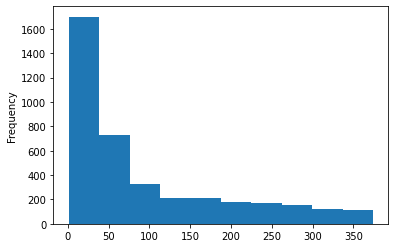

In [20]:
rfm['recency'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

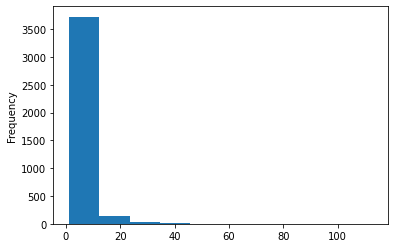

In [21]:
rfm['frequency'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

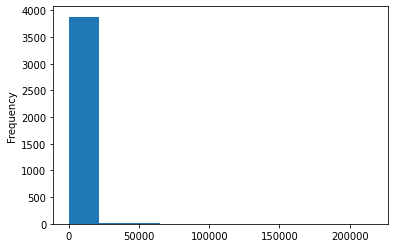

In [22]:
rfm['monetary'].plot.hist()

# Segmentation Method 1: Quartile String

In [23]:
rfm["recency_score"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])
rfm["frequency_score"] = pd.qcut(rfm['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm["monetary_score"] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])
rfm['rfm_score'] = rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str)
rfm.head()

,CustomerID,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score
0,12346,326.0,1.0,101.92,1,1,1,11
1,12747,3.0,11.0,4196.01,5,5,5,55
2,12748,1.0,113.0,30365.93,5,5,5,55
3,12749,4.0,4.0,3818.20,5,4,5,54
4,12820,4.0,4.0,942.34,5,4,4,54


In [24]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

rfm['segment1'] = rfm['rfm_score'].replace(seg_map, regex=True)
rfm.head()

,CustomerID,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score,segment1
0,12346,326.0,1.0,101.92,1,1,1,11,hibernating
1,12747,3.0,11.0,4196.01,5,5,5,55,champions
2,12748,1.0,113.0,30365.93,5,5,5,55,champions
3,12749,4.0,4.0,3818.20,5,4,5,54,champions
4,12820,4.0,4.0,942.34,5,4,4,54,champions


In [25]:
rfm['segment1'].value_counts().sort_values()

new_customers           37
cant_loose              60
promising               84
need_attention         162
about_to_sleep         322
potential_loyalists    446
at_Risk                524
champions              574
loyal_customers        738
hibernating            963
Name: segment1, dtype: int64

In [26]:
rfm.groupby('segment1')[['recency', 'frequency', 'monetary']].agg('mean')

,recency,frequency,monetary
segment1,,,
about_to_sleep,53.161491,1.127329,423.424658
at_Risk,152.793893,2.732824,890.255344
cant_loose,128.233333,7.166667,2482.059000
champions,6.351916,10.733449,5625.964669
hibernating,218.760125,1.072690,331.991859
loyal_customers,34.040650,5.800813,2314.808428
need_attention,52.598765,2.197531,821.883210
new_customers,7.864865,1.000000,296.574324
potential_loyalists,17.372197,1.930493,649.645202


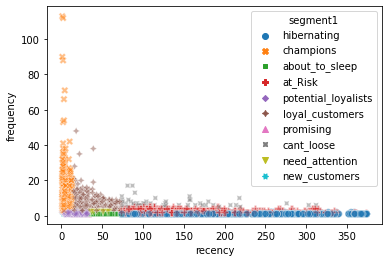

In [27]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.scatterplot(x='recency', 
                y='frequency', 
                hue='segment1', # different colors by group
                style='segment1', # different shapes by group
                s=50, # marker size
                alpha=.5,
                data=rfm)
plt.show()

# Segmentation Method 2: Quartile Sum

In [28]:
def rfm_level_by_sum(score):
    if score >= 12:
        return 'Can\'t Loose Them'
    elif score >= 11:
        return 'Champions'
    elif score >= 10:
        return 'Loyal'
    elif score >= 9:
        return 'Potential'
    elif score >= 8:
        return 'Promising'
    elif score >= 7:
        return 'Needs Attention'
    else:
        return 'Require Activation'

rfm['rfm_sum'] = rfm['recency_score'].astype(int) + rfm['frequency_score'].astype(int) + rfm['monetary_score'].astype(int)
rfm['segment2'] = rfm['rfm_sum'].map(lambda x: rfm_level_by_sum(x))
rfm.head()

,CustomerID,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score,segment1,rfm_sum,segment2
0,12346,326.0,1.0,101.92,1,1,1,11,hibernating,3,Require Activation
1,12747,3.0,11.0,4196.01,5,5,5,55,champions,15,Can't Loose Them
2,12748,1.0,113.0,30365.93,5,5,5,55,champions,15,Can't Loose Them
3,12749,4.0,4.0,3818.20,5,4,5,54,champions,14,Can't Loose Them
4,12820,4.0,4.0,942.34,5,4,4,54,champions,13,Can't Loose Them


In [29]:
rfm['segment2'].value_counts().sort_values()

Champions              297
Potential              310
Loyal                  311
Needs Attention        329
Promising              330
Can't Loose Them      1145
Require Activation    1188
Name: segment2, dtype: int64

In [30]:
rfm.groupby('segment2')[['recency', 'frequency', 'monetary']].agg('mean')

,recency,frequency,monetary
segment2,,,
Can't Loose Them,19.793886,8.622707,4304.068760
Champions,44.340067,3.643098,1263.330404
Loyal,53.745981,2.864952,923.612251
Needs Attention,98.680851,1.531915,434.262644
Potential,68.083871,2.338710,773.247387
Promising,89.081818,1.960606,573.956909
Require Activation,191.357744,1.107744,254.277054


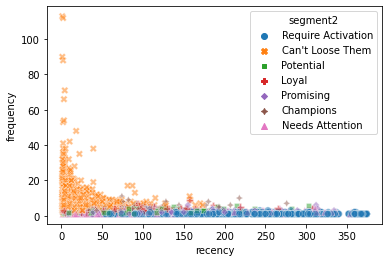

In [31]:
sns.scatterplot(x='recency', 
                y='frequency', 
                hue='segment2', # different colors by group
                style='segment2', # different shapes by group
                s=50, # marker size
                alpha=.5,
                data=rfm)
plt.show()

# Segmentation Method 3: K-Means
- 최적의 군집수를 결정하기 위해 Elbow Method, Silhouette Score를 사용
- StandardScaler를 적용시키는 것이 성능이 괜찮아 보임
    - 근거 1: 각 군집에 포함되는 고객의 수가 상대적으로 균등함
    - 근거 2: 박스플롯을 그려봤을 때 군집별로 차이가 뚜렷함

In [32]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

kmeans_data = rfm[['recency', 'frequency', 'monetary']]
standard_scaler = StandardScaler()
kmeans_data = standard_scaler.fit_transform(kmeans_data)
kmeans_data = pd.DataFrame(kmeans_data, columns=['recency', 'frequency', 'monetary'])
kmeans_data.head()

,recency,frequency,monetary
0,2.338961,-0.499027,-0.277365
1,-0.900688,1.254383,0.454568
2,-0.920748,19.139169,5.133168
3,-0.890658,0.026996,0.387024
4,-0.890658,0.026996,-0.127116


In [33]:
kmeans_data.describe()

,recency,frequency,monetary
count,3.910000e+03,3.910000e+03,3.910000e+03
mean,8.765367e-17,2.749648e-16,-3.482402e-17
std,1.000128e+00,1.000128e+00,1.000128e+00
min,-9.207475e-01,-4.990269e-01,-2.955859e-01
25%,-7.502397e-01,-4.990269e-01,-2.445341e-01
50%,-4.192538e-01,-3.236858e-01,-1.832544e-01
75%,5.135244e-01,2.699624e-02,-2.386865e-02
max,2.820395e+00,1.913917e+01,3.842681e+01


## Elbow Methods

In [34]:
inertia = []
k = [1,2,3,4,5,6,7,8,9]
for i in k:
    kmean = KMeans(n_clusters=i, random_state=42)
    kmean.fit(kmeans_data)
    inertia.append(kmean.inertia_)

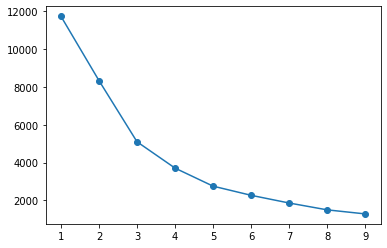

In [35]:
plt.plot(k, inertia, marker='o');

## Silhouette Score

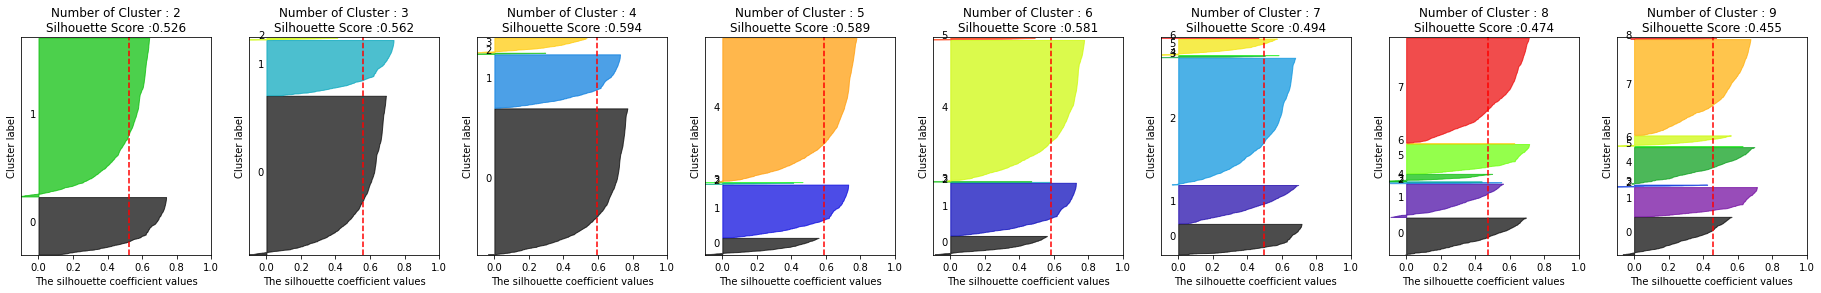

In [36]:
# 출처: https://ariz1623.tistory.com/224
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")
        
visualize_silhouette([2,3,4,5,6,7,8,9], kmeans_data[['recency', 'frequency', 'monetary']])

군집의 수는 4로 결정

In [37]:
from sklearn import metrics

kmeans = KMeans(n_clusters=4, init = "k-means++", random_state = 42)
kmeans.fit(kmeans_data)

KMeans(n_clusters=4, random_state=42)

In [38]:
rfm['segment3'] = kmeans.labels_
rfm.head()

,CustomerID,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score,segment1,rfm_sum,segment2,segment3
0,12346,326.0,1.0,101.92,1,1,1,11,hibernating,3,Require Activation,2
1,12747,3.0,11.0,4196.01,5,5,5,55,champions,15,Can't Loose Them,1
2,12748,1.0,113.0,30365.93,5,5,5,55,champions,15,Can't Loose Them,3
3,12749,4.0,4.0,3818.20,5,4,5,54,champions,14,Can't Loose Them,0
4,12820,4.0,4.0,942.34,5,4,4,54,champions,13,Can't Loose Them,0


In [39]:
rfm.groupby('segment3')[['recency', 'frequency', 'monetary']].agg('mean')

,recency,frequency,monetary
segment3,,,
0,45.113321,3.195122,1134.498705
1,11.613027,16.310345,7346.812222
2,247.893375,1.471014,427.321408
3,7.055556,46.944444,61718.209444


## K-Means Segmentation 결과 해석

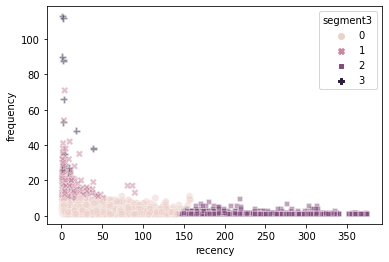

In [40]:
sns.scatterplot(x='recency', 
                y='frequency', 
                hue='segment3', # different colors by group
                style='segment3', # different shapes by group
                s=50, # marker size
                alpha=.5,
                data=rfm)
plt.show()

In [41]:
rfm['segment3'].value_counts().to_frame().transpose()

,0,2,1,3
segment3,2665,966,261,18


- 2번 군집은 다른 군집에 비해 recency가 높다. 즉, 최근에 활동한적이 없는 고객군이다.
- 0, 2번 군집은 1, 3번 군집에 비해 구매 빈도가 적다.
- 3번 군집은 다른 군집들에 비해 돈을 많이 썼다.

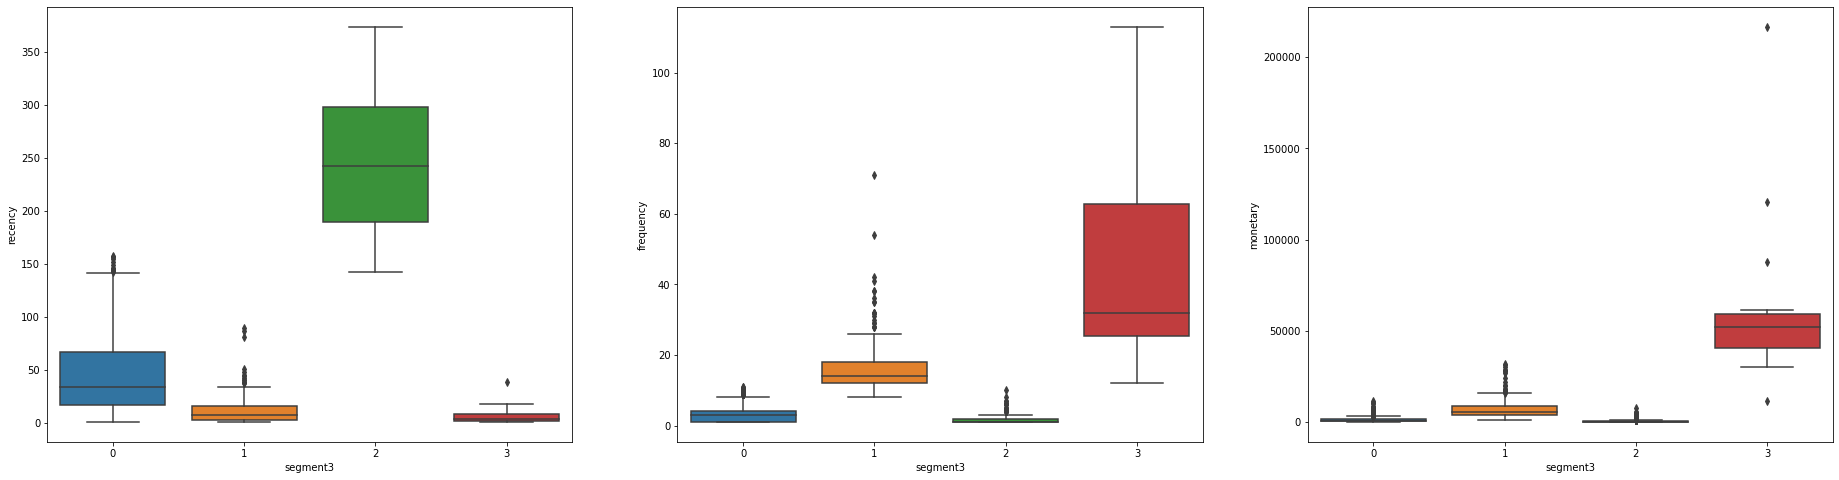

In [42]:
plt.figure(figsize=(32, 8))
plt.subplot(1,3,1)
sns.boxplot(data=rfm, x='segment3', y='recency')
plt.subplot(1,3,2)
sns.boxplot(data=rfm, x='segment3', y='frequency')
plt.subplot(1,3,3)
sns.boxplot(data=rfm, x='segment3', y='monetary')
plt.show()

정리하자면 다음과 같다.

| Clusters | Recency                   | Frequency         | Monetary         |
|----------|---------------------------|-------------------|------------------|
| 0        | Recently visited          | Least frequent    | Least spending   |
| 1        | Most Recently visited     | Decent frequency  | Decent Spending  |
| 2        | Have not visited recently | Least frequent    | Least spending   |
| 3        | Most Recently visited     | Highest frequency | Spending Highest |